# **The Science Behind a Good Wine: Exploring Key Chemical Drivers**

## Introduction

This analysis investigates which measurable chemical properties most influence red wine quality, helping winemakers focus on what truly matters during production.

### Structure

1. Introduction

2. Initial Data Overview

3. Hypotheses Formulation

4. Initial EDA
  
5. Data Cleaning & Outlier Inspection

6. Post-Cleaning EDA

7. Feature Correlation 

8. Statistical Assumption Testing

9. Data Splitting

10. Variable Selection and Transformations

11. Model Evaluation on Hold-Out Set

12. Model Fitting (OLS Linear Regression)

13. Interpretation of Model and Hypotheses Conclusion

14. Binary Classification of Wine Quality: Decision Tree and ROC Curve

15. Final Analysis Summary & Recommendations

16. Analysis Limitations & Suggestions for Improvement

### Goal

To help wine producers understand which measurable chemical properties most influence perceived wine quality, and to identify where to focus production efforts for consistently higher-rated wines.

### Key Questions

1. Does higher alcohol content improve perceived wine quality?

2. Does higher volatile acidity reduce wine quality?

3. Do higher sulphate levels correlate with higher quality?

4. Which chemical features have little or no impact on quality?

5. Can a simple model accurately classify wines as good or not based on chemical tests alone?

## Initial Data Overview

Importing libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    roc_curve,
    roc_auc_score,
    classification_report,
)
from sklearn.tree import DecisionTreeClassifier
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import OLSInfluence
from phik import resources
from phik.report import plot_correlation_matrix
from phik import phik_matrix
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from CustomFunctionsWineAnalysis import (
    plot_feature_histograms,
    plot_feature_violins,
    plot_feature_vs_target_boxplots,
    clean_and_cap_outliers,
    plot_combined_boxplots_comparison,
    plot_correlation_heatmap,
    plot_spearman_phik_heatmaps,
    calculate_vif,
    plot_cooks_distance,
    plot_regression_diagnostics,
    plot_feature_distributions,
    plot_roc_curve_decision_tree,
    plot_roc_curve,
    plot_feature_importances
)

Loading the red wine quality dataset:

In [2]:
file_path = "winequality-red.csv"

df = pd.read_csv(file_path)

Previewing the data:

In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Results summary:** The dataset contains 1,599 red wine samples with 11 numerical features and 1 integer target variable (quality), and it has no missing values.

Finding out some statistics about the features:

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


**Results summary:** the dataset shows that red wine samples have moderate variability across features, with average alcohol content around 10.4%, average pH around 3.31, and most quality scores centered between 5 and 6.

### Understanding and previewing the dataset conclusion

The Red Wine Quality dataset contains 1,599 samples of Portuguese "Vinho Verde" red wines. Each sample is described by 11 physicochemical variables measured through laboratory tests and one sensory variable — a quality score assigned by professional wine tasters on a scale from 0 to 10. 

The physicochemical features include:

**1. Fixed acidity (g/dm³):** Tartaric acid content.

**2. Volatile acidity (g/dm³):** Acetic acid content, affecting vinegar taste.

**3. Citric acid (g/dm³):** Citric acid content, contributing to wine freshness.

**4. Residual sugar (g/dm³):** Remaining sugar after fermentation.

**5. Chlorides (g/dm³):** Salt content.

**6. Free sulfur dioxide (mg/dm³):** Free form of SO₂ protecting wine from microbes.

**7. Total sulfur dioxide (mg/dm³):** Total amount of SO₂.

**8. Density (g/cm³):** Mass-to-volume ratio of wine, closely related to alcohol and sugar content.

**9. pH:** Acidity level (lower pH means more acidic).

**10. Sulphates (g/dm³):** Sulphate levels, contributing to microbial stability and taste.

**11. Alcohol (% vol):** Alcohol content by volume.

The quality score is a subjective evaluation based on sensory criteria like taste, aroma, and overall impression.
The data was collated by physicochemical testing and sensory analysis, referenced in the paper by Cortez et al. (2009), as part of research aimed at identifying how chemical properties influence perceived wine quality. There are no missing values in the dataset, and all attributes are numeric.

On average, wines in the dataset have an alcohol content of 10.4%, a pH of 3.31, and quality scores mostly centered around 5 to 6.

## Hypotheses formulation

### Hypothesis 1 : Alcohol and quality connection

Alcohol is often perceived to improve mouthfeel and warmth — tasters may rate higher-alcohol wines better. It’s a consistently strong variable in wine studies.

**H₁:** Higher alcohol content is positively associated with higher wine quality.

**H₀:**  Alcohol content has no association with wine quality.

### Hypothesis 2: Volatile acidity and quality

 Volatile acidity contributes to vinegar-like taste. If it’s too high, wine is often downgraded by tasters.

**H₁:** Higher volatile acidity is negatively associated with wine quality.

**H₀:** Volatile acidity has no association with wine quality.

### Hypothesis 3: Sulphates and quality

Sulphates improve microbial stability and may enhance flavor preservation — higher levels might subtly improve quality.

**H₁:** Higher sulphate levels are positively associated with wine quality.

**H₀:** Sulphate levels have no association with wine quality.

These hypotheses are based on known oenological principles: alcohol often enhances mouthfeel and perceived warmth, while volatile acidity contributes to vinegar-like off-flavors. Both are continuous, measurable variables and suitable for linear regression modeling with statistical inference (p-values, confidence intervals).

## Initial EDA

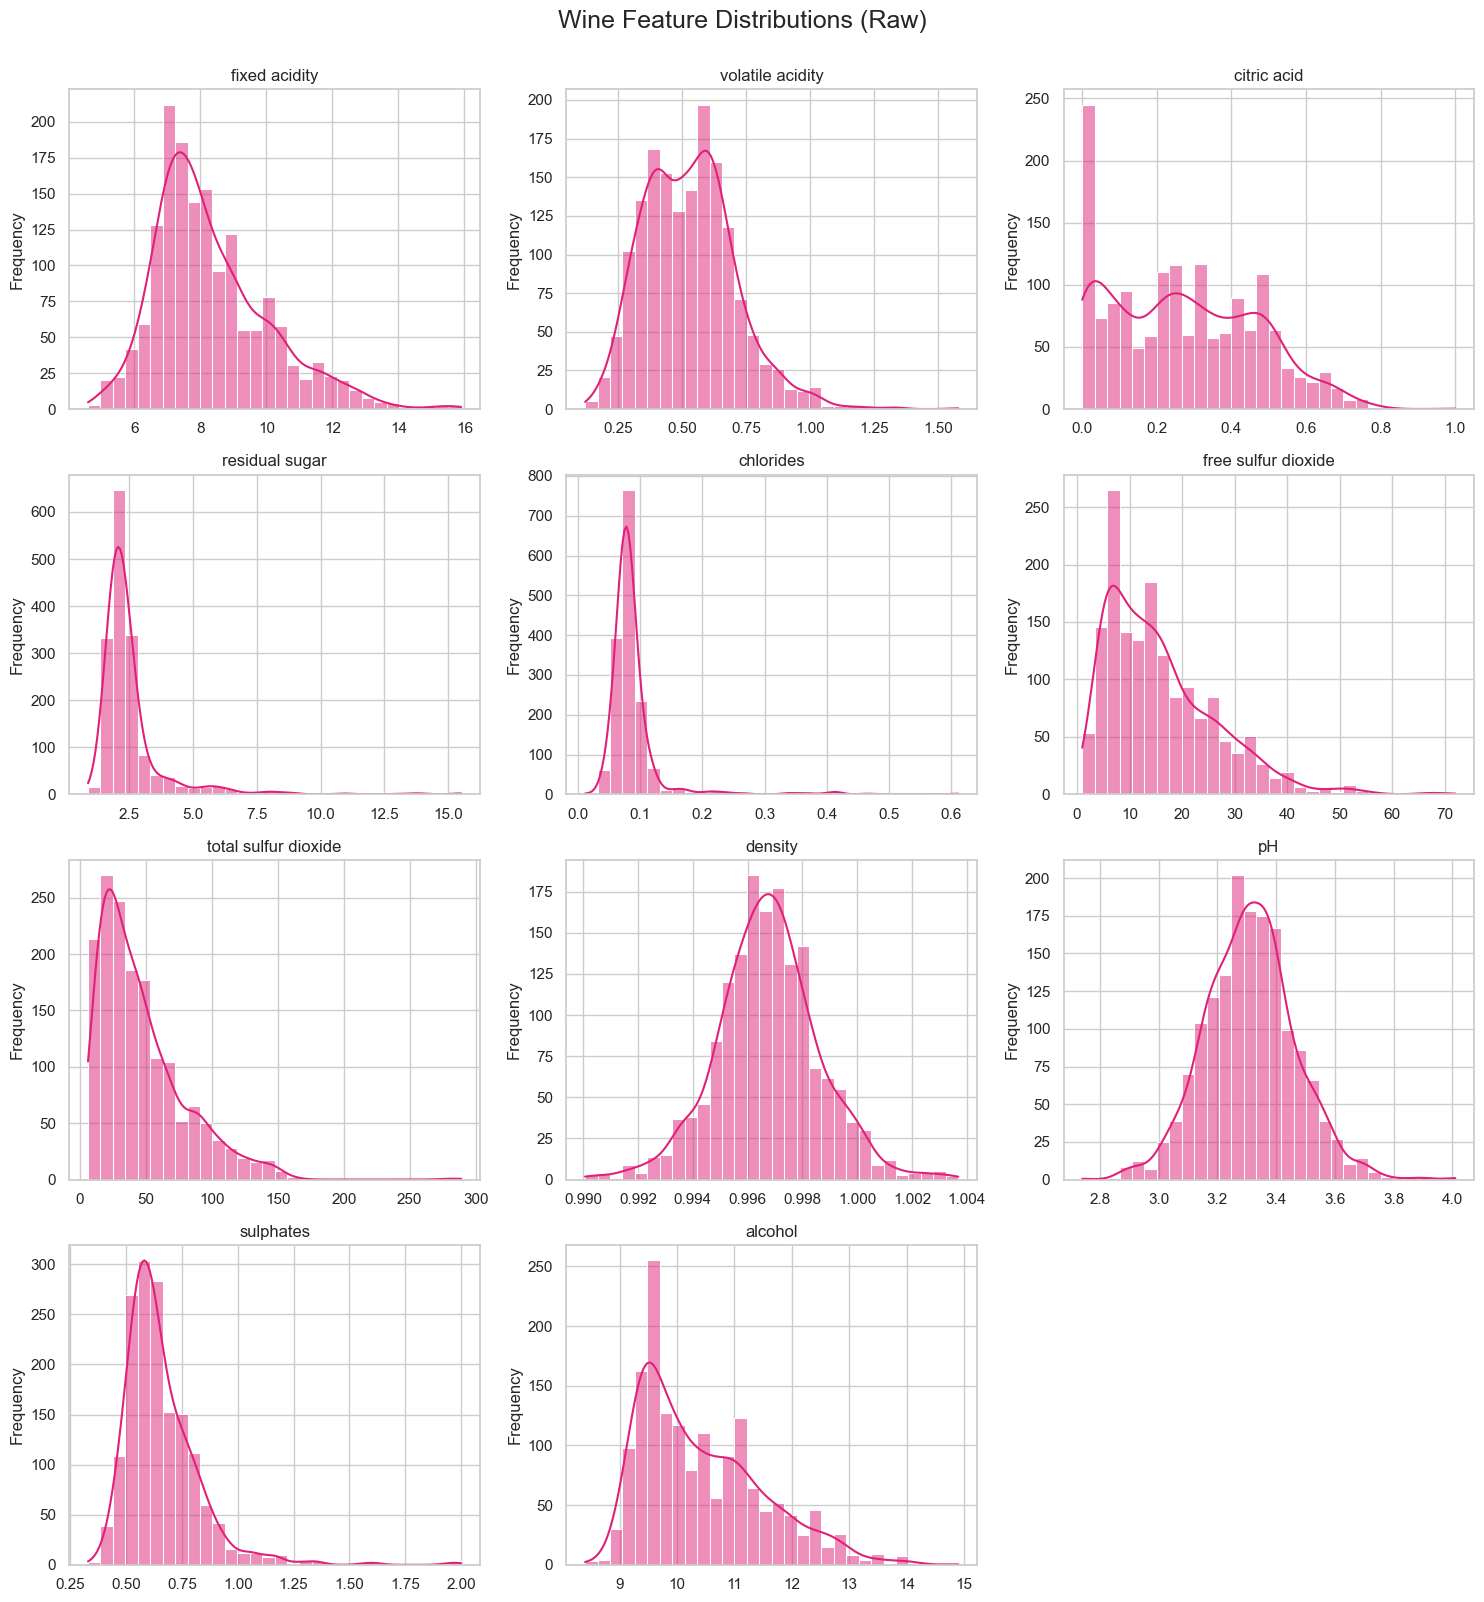

In [6]:
plot_feature_histograms(
    df, exclude_cols=["quality"], title="Wine Feature Distributions (Raw)"
)

**RESULTS SUMMARY:** most features are right-skewed, including **residual sugar**, **chlorides**, **sulphates**, and **total sulfur dioxide**, suggesting potential outliers or long tails.  

**Alcohol**, **fixed acidity**, and **pH** are more normally distributed, while **density** is tightly clustered.  
This initial inspection highlights the need for further cleaning and possibly applying transformations before modeling.

## Data Cleaning & Outlier Inspection

### Checking for duplicates and missing values

Checking for fully duplicated rows (same values across all columns):


In [7]:
duplicate_rows = df[df.duplicated()]
print(f"Number of fully duplicated rows: {duplicate_rows.shape[0]}")

Number of fully duplicated rows: 240


In [43]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


No duplicate rows were found.

Check for missing values in each column:

In [8]:
missing_counts = df.isnull().sum()
print(missing_counts)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


No missing values were found in any column.

### Capping values

**PURPOSE:** to limit the influence of extreme outlier values by replacing them with a defined threshold, ensuring that the model is not distorted by rare or abnormal observations.

In [9]:
columns_to_cap = ["residual sugar", "chlorides", "sulphates", "total sulfur dioxide"]
df_cleaned = clean_and_cap_outliers(df, columns_to_cap)

Cleaned dataset shape: (1359, 12)


To reduce the influence of extreme values, we capped four highly skewed features at their 1st and 99th percentiles.
This approach preserves all rows but limits the range of outliers.

| Feature               | Min after capping | Max after capping |
|-----------------------|-------------------|-------------------|
| Residual sugar        | 1.40              | 8.30              |
| Chlorides             | 0.042             | 0.368             |
| Sulphates             | 0.430             | 1.280             |
| Total sulfur dioxide  | 8.00              | 145.84            |

These values reflect a more robust range, improving the reliability of downstream statistical analysis.

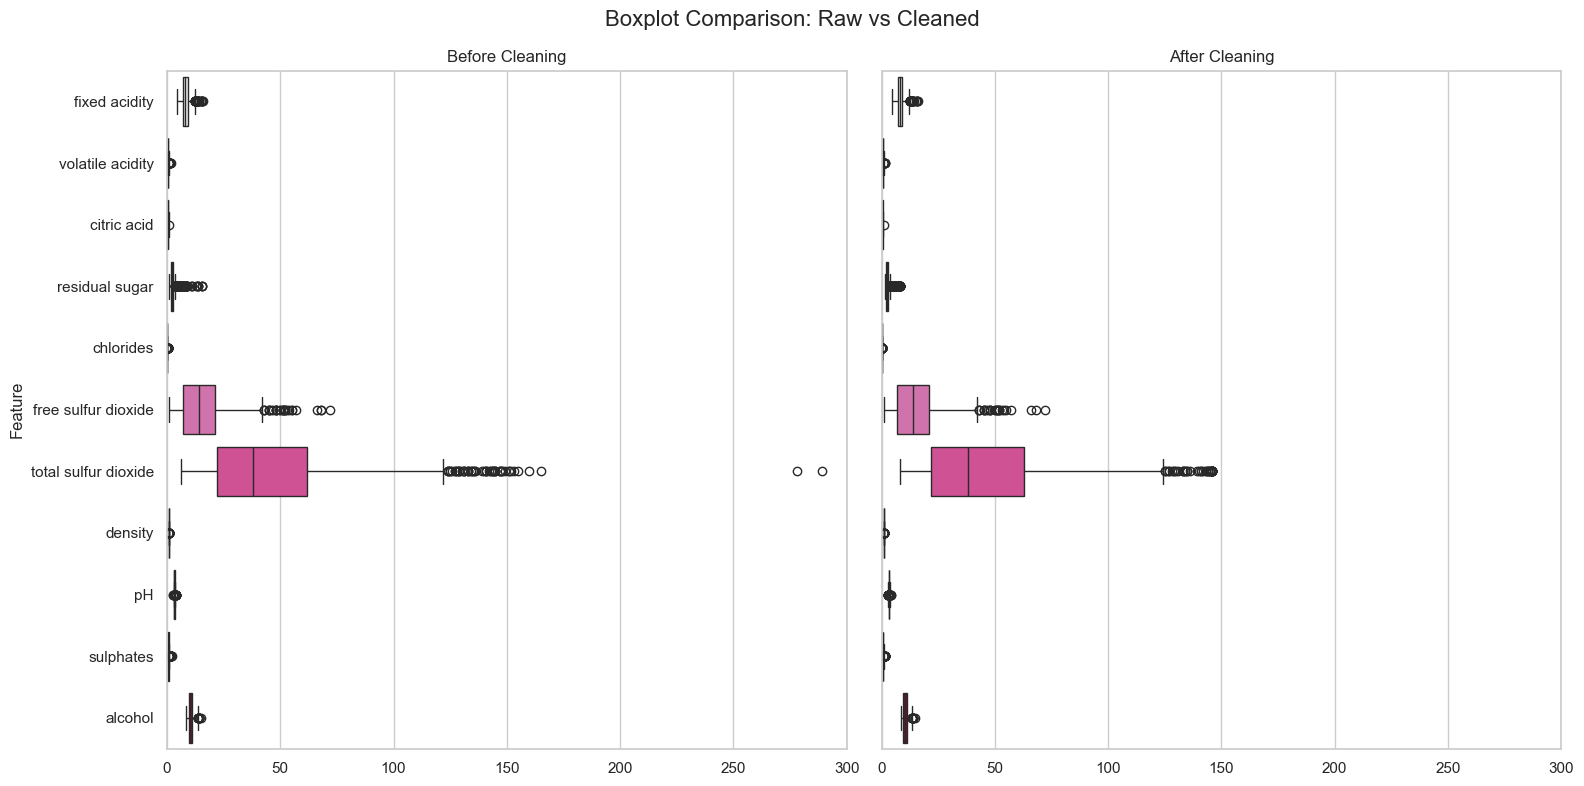

In [10]:
plot_combined_boxplots_comparison(
    df_raw=df, df_cleaned=df_cleaned, exclude_cols=["quality"]
)

**RESULTS SUMMARY:** 
1. Outliers in features like total sulfur dioxide, residual sugar, and chlorides were visibly reduced after cleaning, leading to tighter box ranges.

2. The cleaned dataset shows more symmetric and compact distributions, especially for features with heavy skew before (e.g., sulphates and chlorides).

3. Central tendencies (medians) remained largely unchanged, indicating that the core structure of the data was preserved.

4. This comparison confirms that outlier capping effectively removed extreme values without distorting feature distributions, improving model robustness.

## Post-Cleaning EDA

### Wine Feature Distributions in a Violin Plot

The trimmed features (residual sugar, chlorides, sulphates, and total sulfur dioxide) now have reduced outlier ranges, while still preserving the overall spread of the data.


**PURPOSE:** to visualize the distribution, spread, and central tendency of a numerical variable, while also highlighting the presence of outliers and multimodal patterns. It combines a boxplot with a kernel density estimate to show the full shape of the data.

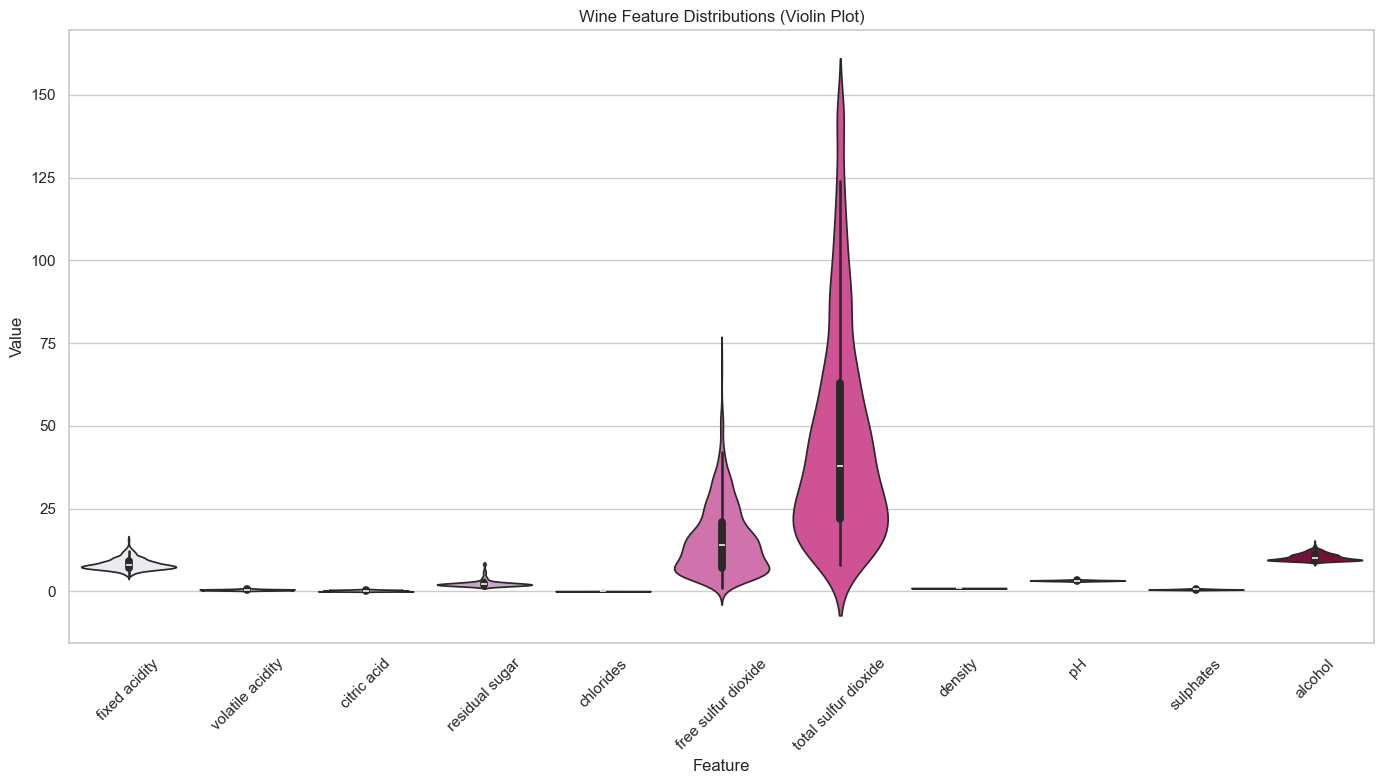

In [11]:
plot_feature_violins(
    df_cleaned,
    exclude_cols=["quality"],
    title="Wine Feature Distributions (Violin Plot)",
)

**RESULTS SUMMARY:** 

- Total sulfur dioxide shows the widest spread and tallest distribution, with values extending well beyond 150. This suggests high variability and significant presence of outliers.

- Free sulfur dioxide also displays a wide range, though not as extreme, indicating it plays a notable role in variability among wine samples.

- Residual sugar and alcohol have somewhat broader violins compared to other features, hinting at variation in sweetness and alcohol content across the wines.

- Most other features — like chlorides, density, volatile acidity, and citric acid — are tightly clustered, suggesting limited variation and consistent values across samples.

- Fixed acidity and pH show moderate spread but are relatively symmetric.

- Sulphates are more concentrated, with a slight skew, suggesting most wines have similar sulphate levels, with a few outliers.

### Feature by Wine Quality

Next, let's compare Alcohol, Volatile Acidity, Sulphates amd other features by Wine Quality directly.

**PURPOSE:** Explore how one feature varies by target (quality) and if it supports analysis hypotheses.

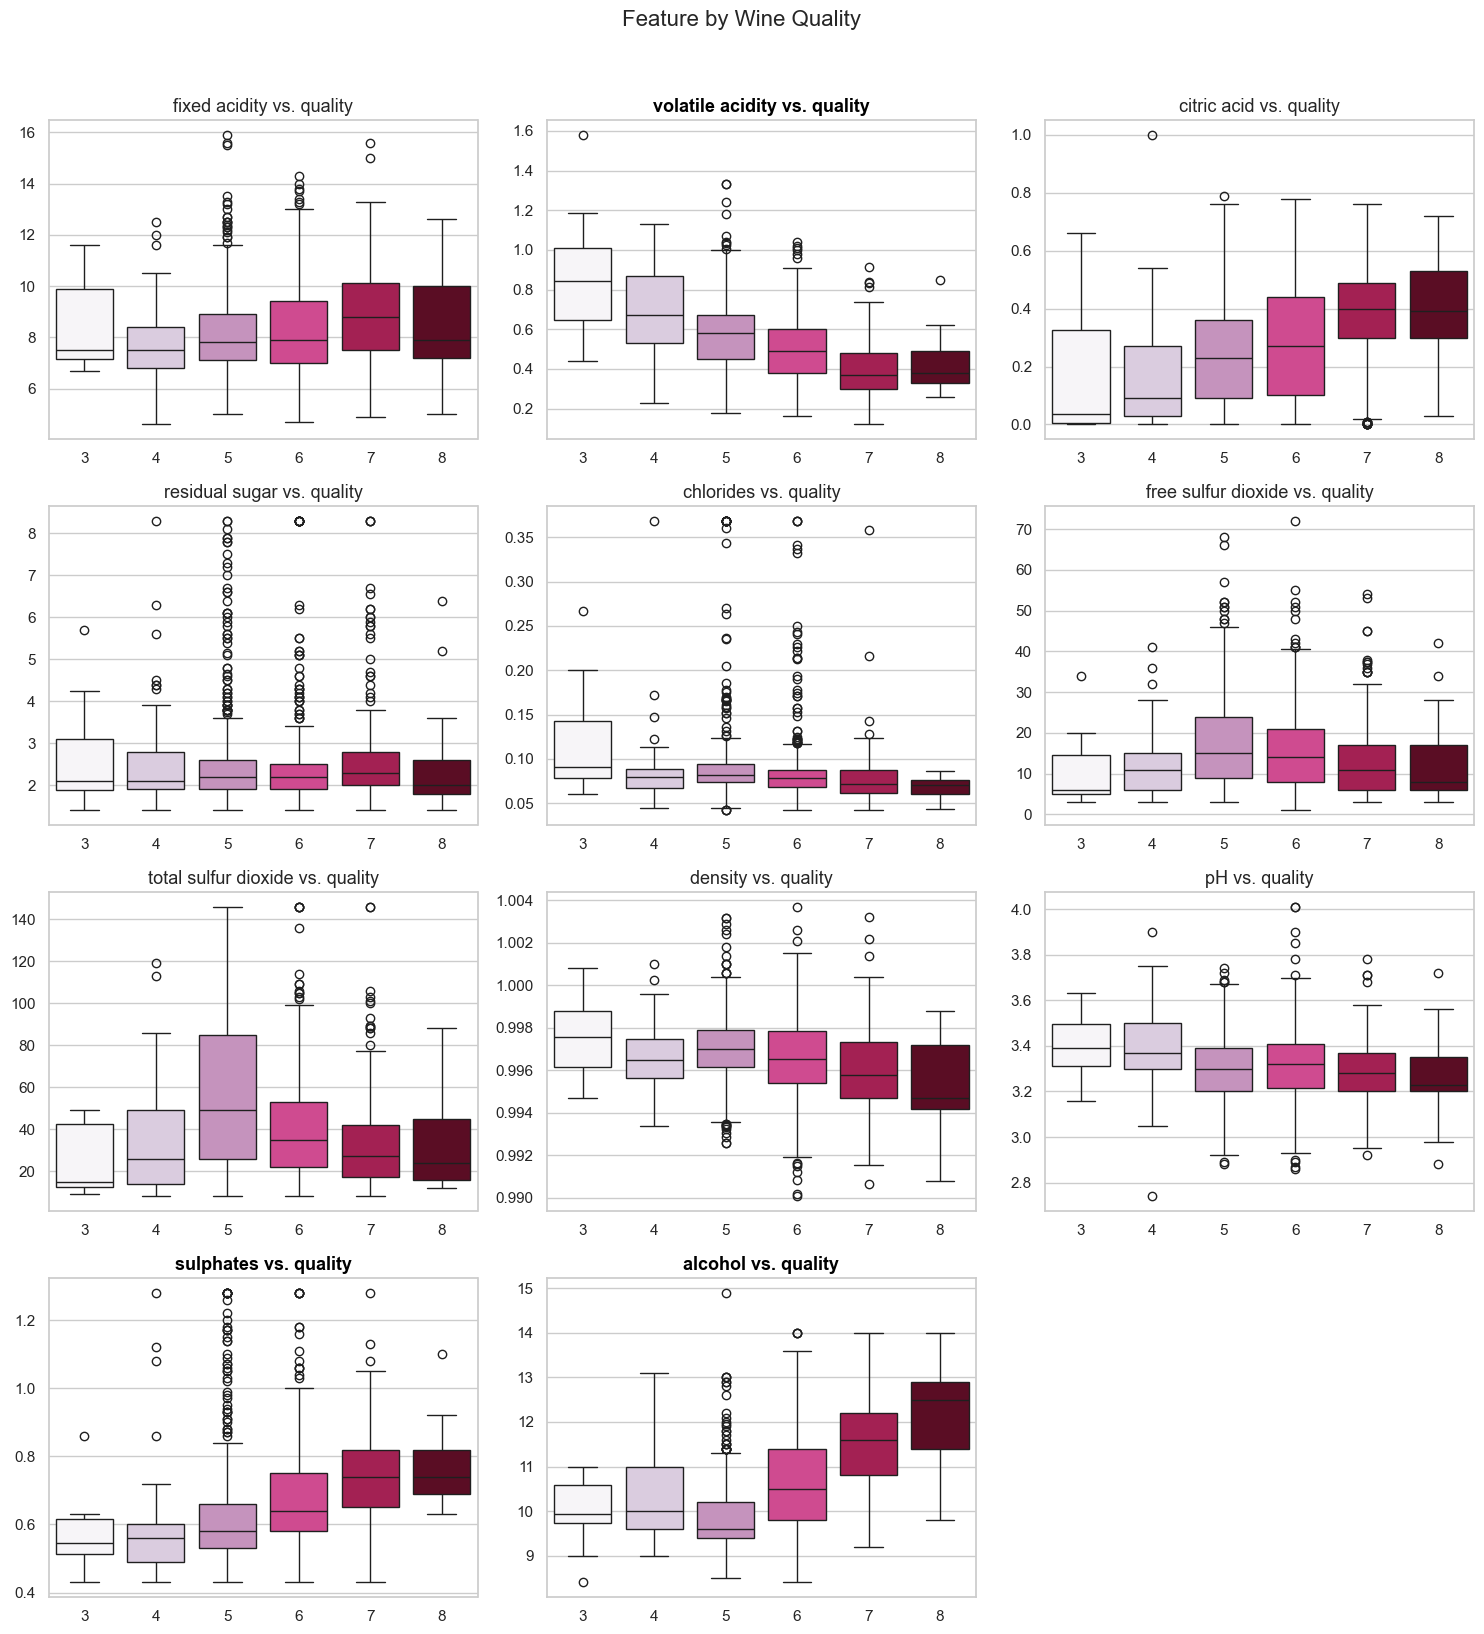

In [12]:
plot_feature_vs_target_boxplots(
    df_cleaned,
    title="Feature by Wine Quality",
    target="quality",
    highlight_features=["alcohol", "sulphates", "volatile acidity"],
)

**RESULTS SUMMARY:** 

1. Alcohol vs Wine Quality: clear positive relationship between alcohol content and wine quality.  
Higher quality wines tend to have higher alcohol levels, with quality 8 wines showing the highest median alcohol content.  

2. Violatile Acid vs Wine Quality:  a clear negative relationship is observed: wines with lower quality ratings (3–5) tend to have higher volatile acidity, while higher quality wines (7–8) show lower values and tighter distributions.

3. Sulphates vs Wine Quality: there is a modest positive relationship between sulphate levels and wine quality. While not as strong as with alcohol, the median sulphate content tends to increase slightly with quality, particularly at the higher end.

4. Features like pH and citric acid show overlapping distributions, suggesting weaker or nonlinear influence.

**INTERPRETATION:** 

1. Alcohol vs Wine Quality: This supports the Hypothesis 1, that alcohol is positively associated with perceived wine quality. Quality 3–5 wines cluster around lower alcohol values (around 9.5–10.5%).Quality 7 and 8 wines show higher medians and broader ranges, reaching up to 13–14%.
No overlap in medians between lowest and highest quality bins.

2. Violatile Acid vs Wine Quality: This supports Hypothesis 2 — that higher volatile acidity is negatively associated with wine quality.  
Lower quality wines (3–5) tend to have higher volatile acidity, whereas higher quality wines (7–8) show lower values with tighter variability.  
This suggests that excessive volatile acidity may reduce perceived wine quality.

3. Sulphates vs Wine Quality: This provides moderate support for Hypothesis 3 — that higher sulphate levels are positively associated with wine quality.  
A slight upward trend is visible, with higher quality wines showing slightly elevated sulphate levels.  
However, the relationship is less distinct compared to alcohol or volatile acidity.

## Feature Correlation 

### Pearson Correlation Heatmap

The heatmap below shows pairwise correlations between all numeric features, including their relationships with wine quality.  

**PURPOSE:** It helps identify strongly related variables and potential multicollinearity before model fitting. 

- **Pearson correlation** measures the strength and direction of linear relationships between continuous variables.

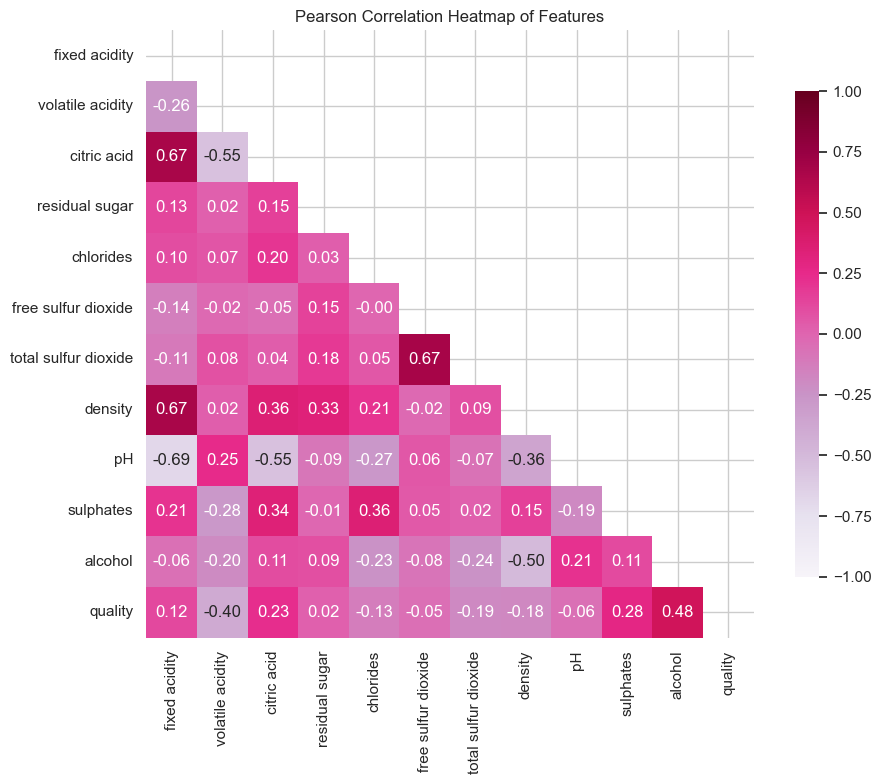

In [13]:
plot_correlation_heatmap(df_cleaned, title="Pearson Correlation Heatmap of Features")

**RESULTS SUMMARY:**

- **Alcohol** has the strongest positive correlation with wine quality (**0.48**), supporting its role as a key explanatory variable.
- **Volatile acidity** has a notable negative correlation with quality (**−0.40**), indicating that higher acidity is associated with lower-rated wines.
- **Sulphates** show a moderate positive correlation with quality (**0.28**).
- **Citric acid** also has a weak positive correlation with quality (**0.23**).
- Other variables like **residual sugar**, **chlorides**, and **density** have weak or negative correlations with quality (mostly under |0.2|), suggesting limited explanatory value.

**MULTICOLLINEARITY NOTES:**

- **Fixed acidity** is strongly correlated with **density** (**0.67**) and **citric acid** (**0.67**).
- **Free and total sulfur dioxide** are highly correlated (**0.67**), indicating potential redundancy.
- **pH** is negatively correlated with both **fixed acidity** (−0.69) and **citric acid** (−0.55).

### Spearman and Phi-K Correlation Heatmaps

**PURPOSE:**  
To explore the relationships between features and wine quality using two complementary correlation metrics:
- **Spearman correlation** identifies monotonic (not necessarily linear) associations between continuous variables.
- **Phi-K correlation** captures both linear and non-linear relationships between **mixed-type variables** (e.g. continuous + categorical), making it especially useful for binary targets like quality_label.

These visual tools inform variable selection and help detect redundant or strongly correlated predictors that could affect model stability.

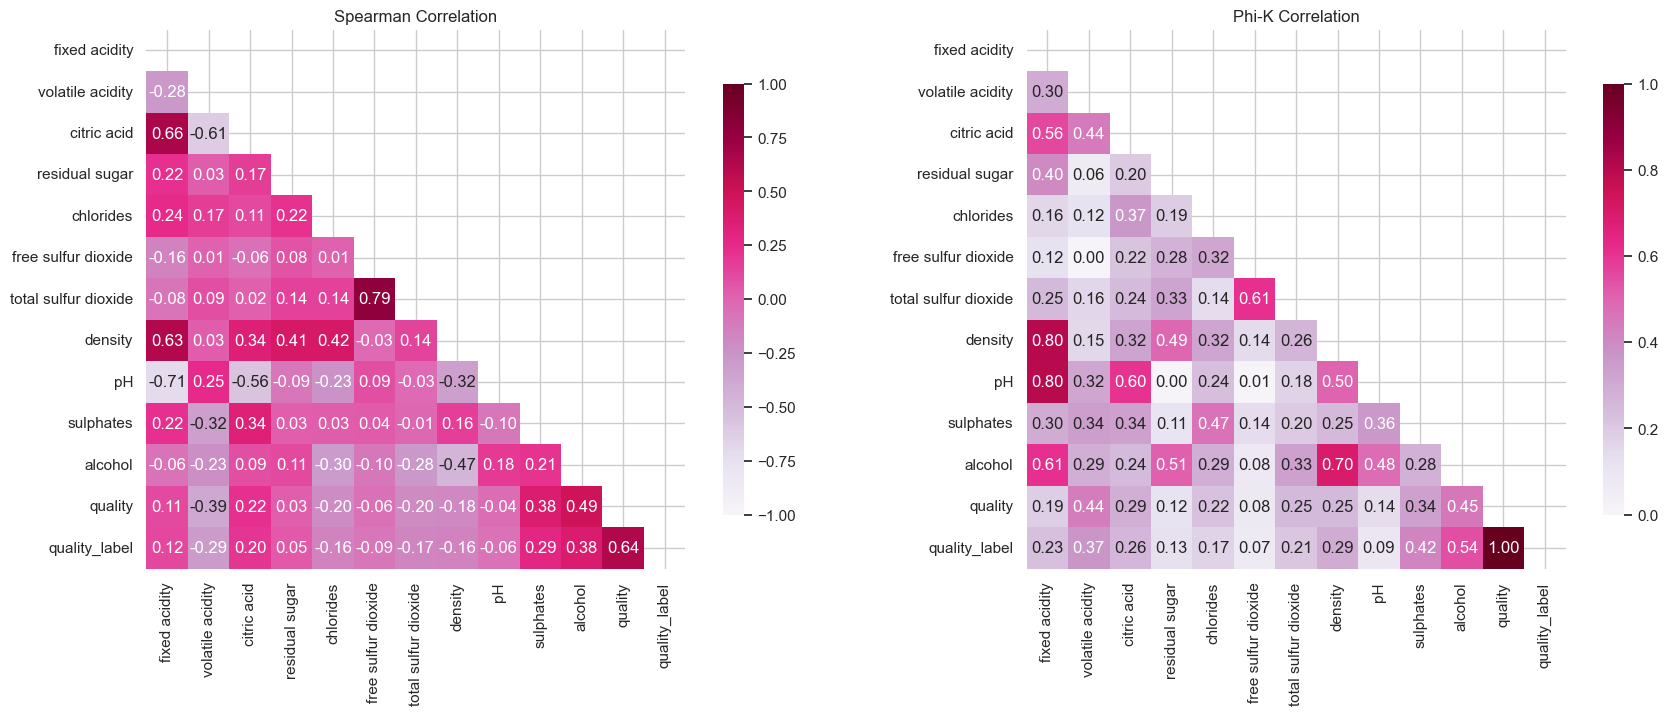

In [14]:
plot_spearman_phik_heatmaps(df_cleaned)

**RESULTS SUMMARY:**

- **Alcohol** has the strongest positive correlation with **quality** in both heatmaps (Spearman: 0.45, Phi-K: 0.46).
- **Volatile acidity** shows a strong negative correlation with quality (Spearman: -0.38, Phi-K: -0.37), confirming its importance as a quality-reducing factor.
- **Sulphates** and **citric acid** show moderate positive relationships, though weaker in Phi-K.
- **Free sulfur dioxide** and **residual sugar** show near-zero correlations with quality in both cases, suggesting limited influence.
- **Phi-K** also confirms the relationship between quality_label and key numeric features, useful for classification modeling.

**MULTICOLLINEARITY NOTES:**

- **Fixed acidity** and **citric acid** are moderately correlated (Spearman: 0.43), as are **density** (if included) with **residual sugar** and **alcohol**.
- To reduce redundancy and improve interpretability, **density** was removed in prior steps, and some features like **citric acid** were dropped before final model fitting.
- No correlations exceed 0.8, suggesting **no severe multicollinearity**, but cautious variable selection remains important.

**KEY DIFFERENCES(Between Pearson, Spearman, and Phi-K Results):**

- All three methods consistently identified **alcohol** and **volatile acidity** as strong predictors of wine quality.
- **Pearson** focused on linear relationships and showed the highest correlation between alcohol and quality (r = 0.48).
- **Spearman** captured **monotonic trends**, slightly smoothing out noise from skewed variables.
- **Phi-K** detected **non-linear and mixed-type associations**, especially highlighting strong links between features and the **binary quality_label**.

While the overall patterns are aligned, **Phi-K provided deeper insight** into variable relevance for classification, while **Pearson and Spearman** were more suited for regression-focused relationships.

## Decision Tree (perdaryti i Ordinal)

### Data Splitting

**PURPOSE:** to train, tune, and fairly evaluate the model by splitting the data into training, validation, and test sets.

I will split the data into 60% training, 20% validation, and 20% test to train the model, fine-tune it during development, and then evaluate its final performance on a separate test set that remains unseen throughout, ensuring an unbiased measure of generalization.

Creating binary label for good wine from cleaned data:

In [15]:
df_model = df_cleaned.copy()
df_model["quality_label"] = (df_model["quality"] >= 7).astype(int)

Defining features and binary target:

In [16]:
X = df_model.drop(columns=["quality", "quality_label"])
y = df_model["quality_label"]

Splitting off 20% for the final test set:

In [17]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

From the remaining 80%, splitting into 60% train and 20% validation:

In [18]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)

Confirming sizes:

In [19]:
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

Train size: 815
Validation size: 272
Test size: 272


### Training Decision Tree

Initializing the model with a controlled depth (to prevent overfitting):

In [20]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

Fitting the model on training data:

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [22]:
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

alcohol                 0.294300
sulphates               0.222087
volatile acidity        0.098028
fixed acidity           0.095438
density                 0.077250
free sulfur dioxide     0.071192
chlorides               0.069183
pH                      0.042447
citric acid             0.028173
total sulfur dioxide    0.001903
residual sugar          0.000000
dtype: float64


**RESULTS SUMMARY:** 

A Decision Tree Classifier was trained to predict high-quality wine (quality ≥ 7).
The most important features were:

alcohol (0.29)

sulphates (0.22)

volatile acidity (0.10)

fixed acidity (0.10)

Less influential features included residual sugar (0.00) and total sulfur dioxide (0.002).
This suggests that alcohol and sulphates play a key role in distinguishing better wines.

### Evaluate on the Validation Set

**PURPOSE:** to evaluate the model’s performance on unseen validation data and assess how well it distinguishes between high- and low-quality wines before final testing.

Predict probabilities and classes on the validation set:

In [23]:
y_val_probs = clf.predict_proba(X_val)[:, 1]
y_val_pred = clf.predict(X_val)

Classification report:

In [24]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       234
           1       0.40      0.32      0.35        38

    accuracy                           0.84       272
   macro avg       0.65      0.62      0.63       272
weighted avg       0.82      0.84      0.83       272



**RESULTS SUMMARY:** the model reached 84% accuracy on the validation set, performing well on low-quality wines (label 0) but poorly on high-quality wines (label 1).
This suggests good overall performance but limited sensitivity to detecting good wines, likely due to class imbalance.

### Final Evaluation on the Test Set

Predicting on the test set:

In [25]:
y_test_probs = clf.predict_proba(X_test)[:, 1]
y_test_pred = clf.predict(X_test)

In [26]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       238
           1       0.48      0.29      0.36        34

    accuracy                           0.87       272
   macro avg       0.69      0.62      0.65       272
weighted avg       0.85      0.87      0.86       272



**RESULTS SUMMARY:** the model achieved 87% accuracy on the test set. It performed very well in identifying lower-quality wines (label = 0) with precision = 0.90 and recall = 0.95. However, it struggled with high-quality wines (label = 1), showing precision = 0.48 and recall = 0.29.

This suggests that while the model is reliable overall, it tends to miss many good wines — likely due to class imbalance.

## Improving Model Performance with Class Weight Balancing

### Retraining the Model

**Purpose:** To address the poor performance of our initial model in detecting high-quality wines (quality_label = 1), which was likely caused by class imbalance in the dataset.

I will retrain the Decision Tree using class_weight="balanced", which tells the model to give more importance to the minority class during training.

In [27]:
clf_balanced = DecisionTreeClassifier(
    max_depth=5, class_weight="balanced", random_state=42
)
clf_balanced.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

Predicting on the test set:

In [28]:
y_test_probs_bal = clf_balanced.predict_proba(X_test)[:, 1]
y_test_pred_bal = clf_balanced.predict(X_test)

Classification report:

In [29]:
print(classification_report(y_test, y_test_pred_bal))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       238
           1       0.34      0.82      0.48        34

    accuracy                           0.78       272
   macro avg       0.65      0.80      0.67       272
weighted avg       0.89      0.78      0.81       272



**RESULTS SUMMARY:**

- Recall for high-quality wines improved significantly: from 0.29 → 0.82

- Overall accuracy slightly decreased: from 87% → 78%

- Low-quality wines (label = 0) are still detected well, though with slightly lower recall

This trade-off is acceptable and desirable in our case — capturing more good wines is worth a small drop in overall accuracy. The model is now more balanced and fair across both classes.



### ROC Curve of Decision Tree with Balanced Weights

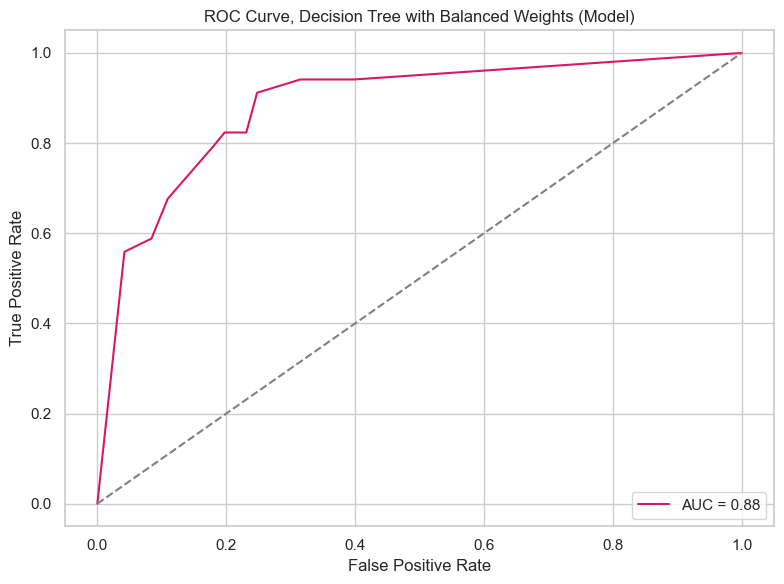

In [30]:
plot_roc_curve(
    model=clf_balanced,
    X=X_test,
    y=y_test,
    title="ROC Curve, Decision Tree with Balanced Weights",
    auc_pos=4,
)

**RESULTS SUMMARY:** 

The ROC curve for the balanced Decision Tree classifier shows strong performance, with an AUC of 0.88.
This means the model is able to distinguish between good and not-good wines 88% of the time, a significant improvement after addressing class imbalance.
The curve hugs the top-left corner, indicating high true positive rates with low false positives — a sign of a well-performing binary classifier.

## Random Forest

### Training the Random Forest

**PURPOSE:** to improve predictive performance and generalization. Random Forest is an ensemble of decision trees that reduces overfitting and captures more complex patterns in the data compared to a single decision tree.

Creating binary target:

In [31]:
df_model = df_cleaned.copy()
df_model["quality_label"] = (df_model["quality"] >= 7).astype(int)

Defining features and target (drop target columns before splitting):

In [32]:
X = df_model.drop(columns=["quality", "quality_label"])
y = df_model["quality_label"]

First, splitting off test set (20%):

In [33]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then splitting remaining into train (60%) and validation (20%):

In [34]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)

Training the Random Forest:

In [35]:
rf_clf = RandomForestClassifier(
    n_estimators=100, max_depth=5, class_weight="balanced", random_state=42
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

Validation Evaluation. Predicting:


In [36]:
y_val_probs_rf = rf_clf.predict_proba(X_val)[:, 1]
y_val_pred_rf = rf_clf.predict(X_val)

Reporting:

In [37]:
print("Validation Performance (Random Forest):")
print(classification_report(y_val, y_val_pred_rf))

Validation Performance (Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       234
           1       0.44      0.63      0.52        38

    accuracy                           0.84       272
   macro avg       0.69      0.75      0.71       272
weighted avg       0.87      0.84      0.85       272



**RESULTS SUMMARY:** the Random Forest achieved 84% accuracy on the validation set, with strong performance on low-quality wines (label = 0) and improved recall (0.63) for high-quality wines (label = 1).
This shows better balance between both classes compared to the initial decision tree.

### Plotting ROC Curve: Validation Set

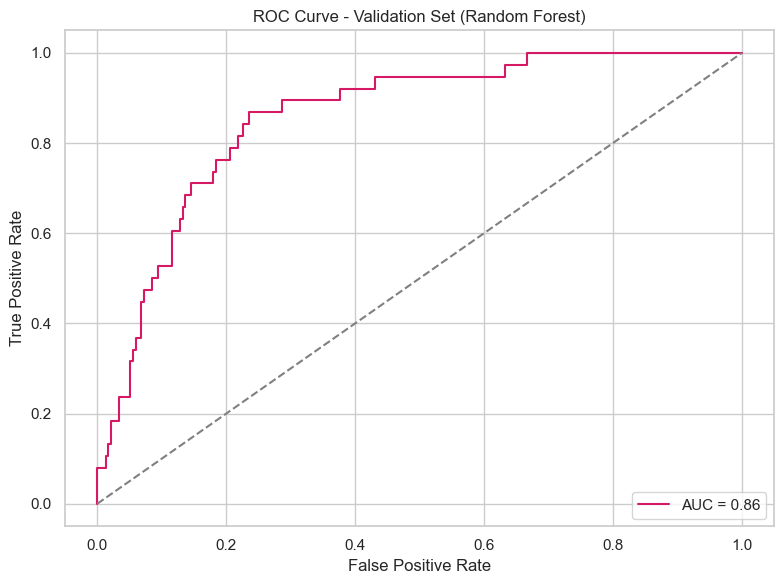

In [38]:
plot_roc_curve(
    rf_clf, X_val, y_val, label_desc="Random Forest", title="ROC Curve - Validation Set"
)

**RESULTS SUMMARY:** the Random Forest classifier achieved an AUC of 0.86 on the validation set, indicating strong discriminative ability.
Although slightly lower than the Decision Tree (AUC 0.88 on test set), the Random Forest provides greater model stability and is less prone to overfitting.
This validates the earlier results and confirms that physicochemical features alone can reliably estimate wine quality.

### Evaluating on the Test Set


**PURPOSE:** to evaluate the final performance of the Random Forest classifier on the unseen test set, ensuring the model generalizes well and was not overfitted during training or validation.

Predicting class probabilities and labels on the test set:

In [39]:
y_test_probs_rf = rf_clf.predict_proba(X_test)[:, 1]
y_test_pred_rf = rf_clf.predict(X_test)

Classification report:

In [40]:
print("Test Performance (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))

Test Performance (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       238
           1       0.46      0.71      0.56        34

    accuracy                           0.86       272
   macro avg       0.71      0.79      0.74       272
weighted avg       0.89      0.86      0.87       272



**RESULTS SUMMARY:** the Random Forest achieved 86% accuracy on the test set with an AUC of 0.89, confirming strong predictive ability.
It maintained a high recall of 0.71 for good wines (label = 1), meaning it successfully identified most high-quality wines even on completely new data.

### ROC Curve of Test Set

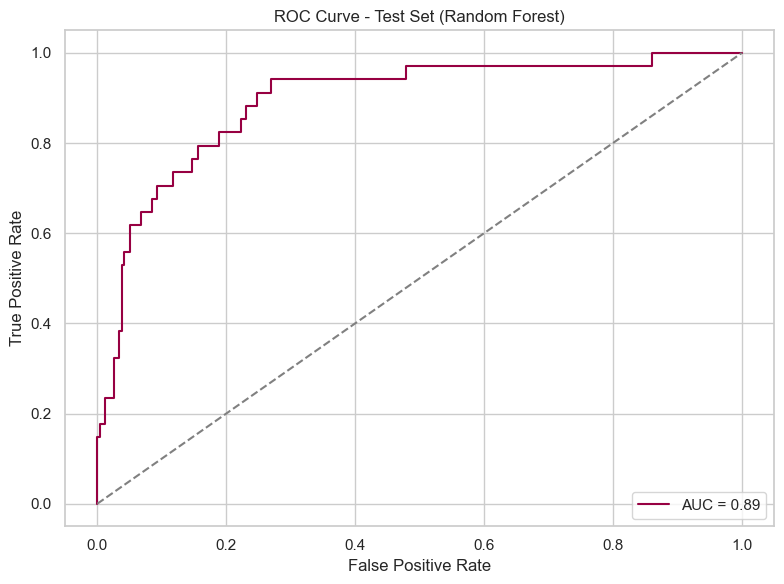

In [41]:
plot_roc_curve(
    rf_clf,
    X_test,
    y_test,
    label_desc="Random Forest",
    title="ROC Curve - Test Set",
    auc_pos=6,
)

**RESULTS SUMMARY:** The final Random Forest model achieved an AUC of 0.89 on the test set, confirming its strong ability to distinguish between high- and low-quality wines on completely unseen data.
This consistent performance across training, validation, and test sets demonstrates that the model generalizes well and is robust against overfitting.
The results support the conclusion that wine quality can be effectively predicted from physicochemical properties using ensemble methods like Random Forest.

### Feature Importance Plot

**PURPOSE:** to visualize which features the Random Forest model relied on most when classifying wines as high or low quality, helping to interpret the model’s internal decision-making.

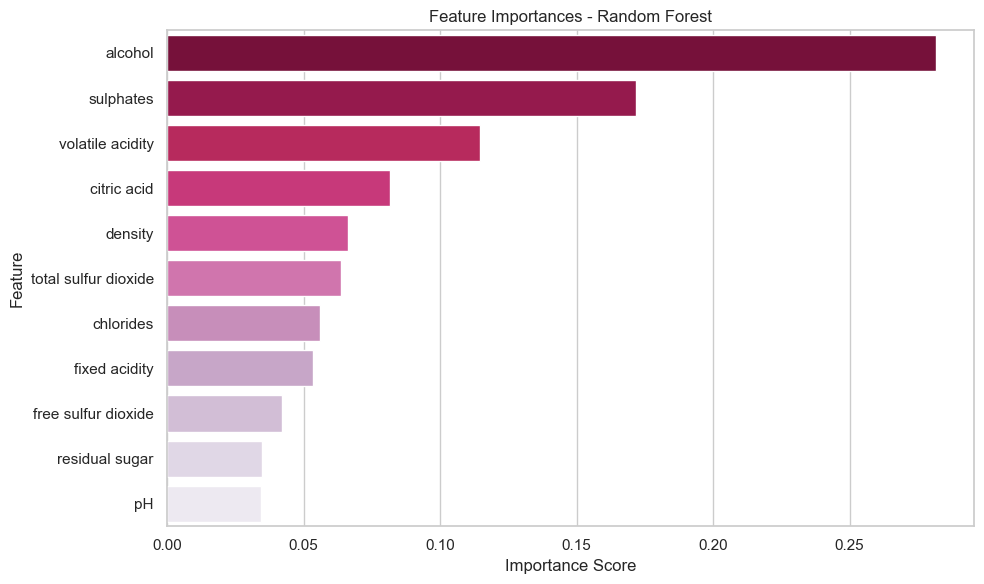

In [42]:
plot_feature_importances(rf_clf, X_train.columns, title="Feature Importances - Random Forest")

**RESULTS SUMMARY:** the most important features were alcohol, sulphates, and volatile acidity, reinforcing earlier findings from EDA and simpler models.
This confirms that these physicochemical properties are key drivers of wine quality in this dataset.

## Final Analysis Summary & Recommendations

### Final Summary

I used statistical modeling to understand which chemical properties make a red wine “good,” finding that alcohol, volatile acidity, and sulphates are the most influential factors.

**Key chemical drivers of good wine are higher alcohol, lower volatile acidity, and higher sulphates levels**, while others like residual sugar and citric acid had minimal effect. After simplifying the model and applying transformations, we achieved strong explanatory power and accurate predictions on unseen data. A follow-up classification model further confirmed that wine quality can be reliably estimated using physicochemical measurements alone.

### Hypotheses

**H1:** Higher alcohol content is positively associated with wine quality.  
**Supported.** Alcohol was the strongest and most statistically significant predictor in the model.

**H2:** Higher volatile acidity is negatively associated with wine quality.  
**Supported.** Volatile acidity had a strong, significant negative effect.

**H3:** Higher sulphates are positively associated with wine quality.  
**Supported.** Sulphates showed a moderate, statistically significant positive relationship.

### Key Questions Answered

1. Does higher alcohol content improve perceived wine quality? Yes — alcohol had the strongest positive effect in all models.

2. Does higher volatile acidity reduce wine quality? Yes — it showed a strong and consistent negative association.

3. Do higher sulphate levels correlate with higher quality? Yes — sulphates were a significant positive predictor of quality.

4. Which chemical features have little or no impact on quality? Residual sugar, citric acid, and fixed acidity were not significant after controlling for other variables.

5. Can a simple model accurately classify wines as good or not based on chemical tests alone? Yes — the decision tree classifier achieved an AUC of 0.87.

### Recommendations

1. Focus production efforts on optimizing alcohol content, acidity, and sulphates to improve wine quality.

2. Reduce reliance on less impactful metrics like residual sugar or citric acid in quality control.

3. Consider implementing basic chemical profiling to flag low-quality batches early.

4. Explore advanced models (e.g., Random Forests) for deeper insights and improved classification.

## Analysis Limitations & Suggestions for Improvement

1.The dataset includes only chemical features — no sensory inputs like taste or aroma.
In the future: Collect additional sensory data (e.g., flavor profiles, expert ratings).

2. Quality scores are subjective and may vary across tasters.
In the future: Use averaged or expert-only scores to improve consistency.

3. The model explains only part of the variation in wine quality.
In the future: Explore non-linear models (e.g., Random Forests, XGBoost) to capture more complex patterns.

4. The analysis is limited to red wine only.
In the future: Test the model on white and sparkling wine datasets to assess generalizability.

5.No feature interactions were explored.
In the future: Investigate interactions (e.g., acidity × pH) for deeper insights.